In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("---------------------")
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

---------------------
x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


In [4]:
# create label list
labels = ["T-shirt","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag" ,"Ankle boot"]

Text(0.5, 1.0, 'T-shirt')

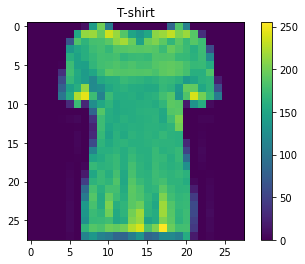

In [6]:
rand = random.randint(0,10) # generate random numbers between 0-10.
image = x_train[rand]
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.title(labels[y_train[rand]])

In [7]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
def create_model():
    inputs = tf.keras.Input(shape=28*28, name="input_layer")
    x = tf.keras.layers.Dense(512, activation="relu", name="first_layer")(inputs)                                           
    x = tf.keras.layers.Dense(256, activation="relu", name="second_layer")(x)
    x = tf.keras.layers.Dense(128, activation="relu", name="third_layer")(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
third_layer (Dense)          (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6101 - accuracy: 0.0983 - val_loss: 27.6100 - val_accuracy: 0.1341
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6100 - accuracy: 0.0991 - val_loss: 27.6100 - val_accuracy: 0.1157
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6100 - accuracy: 0.1004 - val_loss: 27.6100 - val_accuracy: 0.0996
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6100 - accuracy: 0.0987 - val_loss: 27.6100 - val_accuracy: 0.0895
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6101 - accuracy: 0.0972 - val_loss: 27.6100 - val_accuracy: 0.0900
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6100 - accuracy: 0.0976 - val_loss: 27.6100 - val_accuracy: 0.0667
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 27.6100 - accuracy: 0.0985 - val_loss: 27.6100 - val_accuracy:

In [15]:
loss_value, val_accuracy = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print("val_accuracy : ", val_accuracy)

val_accuracy :  0.15459999442100525
